In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
test_df = pd.read_csv("./test.csv")
train_df = pd.read_csv("./train.csv")

In [3]:
test_df.shape

(418, 11)

In [4]:
train_df.shape

(891, 12)

In [5]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Analysis
## Null Data
`.csv` 파일 상에 비어있는 값(null)이 있는지 확인하기. 아래 결과를 보면 Age, Cabin 값이 비어있는 게 많다는 것을 확인할 수 있음!

In [7]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Memory Efficiency
Downcast `int64` to `int`

In [10]:
def downcast(df, cols):
    df_list = []
    for c in cols:
        try:
            df[c] = pd.to_numeric(df[c], downcast = 'integer')
        except:
            pass
        try:
            df[c] = pd.to_numeric(df[c], downcast = 'float')
        except:
            pass
        
        df_list.append(df[c])
        
    return pd.concat(df_list, axis = 1)

In [11]:
cols = train_df.columns
downcast(train_df, cols).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int16  
 1   Survived     891 non-null    int8   
 2   Pclass       891 non-null    int8   
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float32
 6   SibSp        891 non-null    int8   
 7   Parch        891 non-null    int8   
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float32
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float32(2), int16(1), int8(4), object(5)
memory usage: 47.1+ KB


In [12]:
cols = test_df.columns
downcast(test_df, cols).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int16  
 1   Pclass       418 non-null    int8   
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float32
 5   SibSp        418 non-null    int8   
 6   Parch        418 non-null    int8   
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float32
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float32(2), int16(1), int8(3), object(5)
memory usage: 21.8+ KB


## Relation
![image](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FC6Dt0%2FbtqGqbtiD7K%2F7eHuS5eNZ9kWW1IXhUVej0%2Fimg.png)
일단 numeric data들끼리는 그닥 관계가 가시적이진 않아서.. 우선 
- Pclass - Fare
- Pclass - 

## Name

In [13]:
def get_title(name):
    title = name.split(',')[1].split('.')[0]
    return title

In [14]:
train_df.set_index('Name').groupby(get_title).mean()['Survived']

 Capt            0.000000
 Col             0.500000
 Don             0.000000
 Dr              0.428571
 Jonkheer        0.000000
 Lady            1.000000
 Major           0.500000
 Master          0.575000
 Miss            0.697802
 Mlle            1.000000
 Mme             1.000000
 Mr              0.156673
 Mrs             0.792000
 Ms              1.000000
 Rev             0.000000
 Sir             1.000000
 the Countess    1.000000
Name: Survived, dtype: float64

In [19]:
temp_data = train_df.copy()
temp_data['initial'] = 0
temp_data['initial'] = train_df.Name.str.extract('([A-Za-z0-9]+)\.')

In [20]:
temp_data['initial'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Countess      1
Capt          1
Sir           1
Ms            1
Don           1
Jonkheer      1
Mme           1
Lady          1
Name: initial, dtype: int64

In [23]:
pd.crosstab(temp_data.initial, temp_data.Sex).T

initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


## Pclass & Survived

In [16]:
pd.crosstab(train_df.Pclass, train_df.Survived, margins = True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [17]:
train_df[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [24]:
pd.crosstab([train_df.Sex, train_df.Survived], train_df.Pclass, margins = True)

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

In [25]:
train_df[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


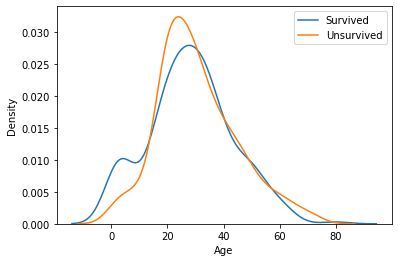

In [26]:
sns.kdeplot(train_df[train_df['Survived']==1]['Age'])
sns.kdeplot(train_df[train_df['Survived']==0]['Age'])
plt.legend(['Survived', 'Unsurvived'])
plt.show()

In [27]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [29]:
combine = [train_df, test_df]

In [30]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [31]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009
